## Autograd
자동미분 기능

In [1]:
import torch
import numpy as np

In [3]:
a = torch.randn(3,3)
a = a*3
print(a)
print(a.requires_grad)# requires_grad를 true로 하면 연산 추적

tensor([[-2.9644,  1.6611,  0.2492],
        [ 3.6817,  0.5640, -1.1215],
        [-1.5978, -3.4619, -0.5045]])
False


In [5]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b)
print(b.grad_fn)

True
tensor(41.5316, grad_fn=<SumBackward0>)


### Gradient

In [6]:
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [7]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [9]:
z = y * y
out = z.mean()
print(z,out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [10]:
#.backward()를 호출하면 역전파 계산이 가능
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


In [11]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [12]:
x = torch.randn(3, requires_grad=True)

y = x*2
while y.data.norm()<1000:
    y = y*2
    
print(y)

tensor([ 590.6960, -186.5075, 1066.0978], grad_fn=<MulBackward0>)


In [13]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [14]:
#with torch.no_grad()로 기울기 업데이트 하지 않음, 모델 평가용
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [18]:
#detatch() r-g가 다른 Tensor를 가져올 때
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 예제

In [19]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [20]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [21]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [22]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [23]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [24]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [25]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


In [26]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [28]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


C:\Users\하정수\AppData\Local\Temp\ipykernel_7844\2485455394.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:485.)
  print(b.grad)


In [29]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


C:\Users\하정수\AppData\Local\Temp\ipykernel_7844\3875808255.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:485.)
  print(c.grad)


In [30]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


C:\Users\하정수\AppData\Local\Temp\ipykernel_7844\578081240.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:485.)
  print(out.grad)


### 데이터 준비

In [31]:
from torch.utils.data import Dataset, DataLoader

In [33]:
import torchvision.transforms as transforms
from torchvision import datasets

In [34]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [37]:
trainset = datasets.MNIST(root='/pytorch',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/pytorch',
                          train=False, download=True,
                          transform=mnist_transform)

In [38]:
train_loader = DataLoader(trainset, batch_size = 8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size = 8, shuffle=False, num_workers=2)

In [44]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape # 8개의 흑백사진

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [45]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [47]:
import matplotlib.pyplot as plt

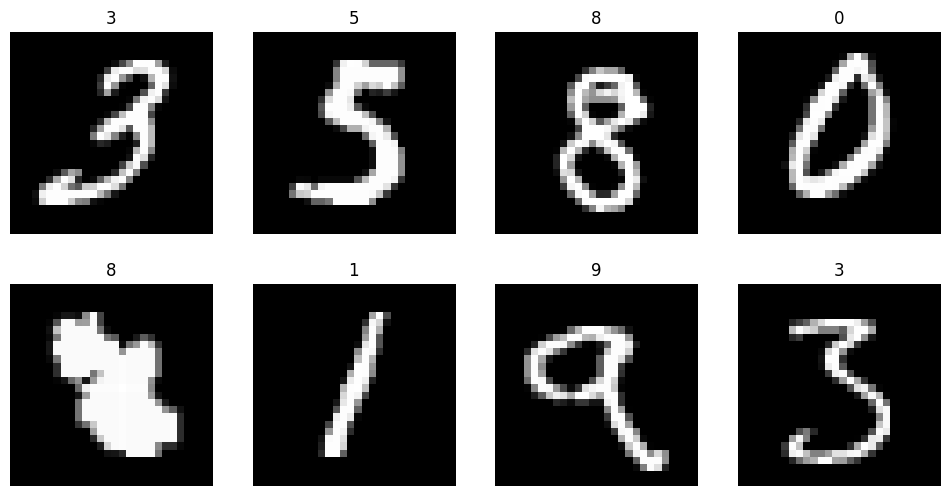

In [48]:
figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')